In [1]:
pip install us

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install census

Note: you may need to restart the kernel to use updated packages.


In [1]:
from census import Census
from us import states
import pandas as pd
from us import states
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

In [3]:
# Import U.S. Census API Key
from config import api_key
if api_key == "YOUR KEY HERE":
    print("Please edit your config.py file.")

# Create an instance of the Census library
c = Census(api_key)
print("Census API instance created successfully")

Census API instance created successfully


In [3]:
json_list = c.acs5.tables()
json_list

[{'name': 'B17015',
  'description': 'Poverty Status in the Past 12 Months of Families by Family Type by Social Security Income by Supplemental Security Income (SSI) and Cash Public Assistance Income',
  'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B17015.json',
  'universe ': 'Families'},
 {'name': 'B18104',
  'description': 'Sex by Age by Cognitive Difficulty',
  'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B18104.json',
  'universe ': 'Civilian noninstitutionalized population 5 years and over'},
 {'name': 'B17016',
  'description': 'Poverty Status in the Past 12 Months of Families by Family Type by Work Experience of Householder and Spouse',
  'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B17016.json',
  'universe ': 'Families'},
 {'name': 'B18105',
  'description': 'Sex by Age by Ambulatory Difficulty',
  'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B18105.json',
  'universe ': 'Civilian noninstitutionalized populat

In [5]:
import json

# Example json_list
json_list = [
    {'name': 'B25039', 'description': 'Median Year Householder Moved Into Unit by Tenure', 'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B25039.json', 'universe': 'Occupied housing units'},
    {'name': 'B25027', 'description': 'Tenure by Year Structure Built', 'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B25027.json', 'universe': 'Housing units'},
    {'name': 'B25088', 'description': 'Median Selected Monthly Owner Costs as a Percentage of Household Income', 'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B25088.json', 'universe': 'Owner-occupied housing units'},
    {'name': 'B25099', 'description': 'Mortgage Status by Median Household Income in the Past 12 Months (in 2022 Inflation-Adjusted Dollars)', 'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B25099.json','universe ': 'Owner-occupied housing units'},
    {'name': 'B19013F', 'description': 'Median Household Income in the Past 12 Months (in 2022 Inflation-Adjusted Dollars) (Some Other Race Alone Householder)', 'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B19013F.json', 'universe ': 'Households with a householder who is Some Other Race alone'},
    {'name': 'B01003', 'description': 'Total Population', 'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B01003.json', 'universe ': 'Total population'},
    {'name': 'B01002', 'description': 'Median Age by Sex', 'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B01002.json', 'universe ': 'Total population'},
    {'name': 'B19301', 'description': 'Per Capita Income in the Past 12 Months (in 2022 Inflation-Adjusted Dollars)', 'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B19301.json', 'universe ': 'Total population'},
    {'name': 'B17001', 'description': 'Poverty Status in the Past 12 Months by Sex by Age', 'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B17001.json', 'universe ': 'Population for whom poverty status is determined'},
    {'name': 'B25077', 'description': 'Median Value (Dollars)', 'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B25077.json', 'universe ': 'Owner-occupied housing units'}]

# Tables to include
include_tables = [
    "B25039", "B25027", "B25027", "B25088", "B25088", "B25099", "B25099", 
    "B19013", "B01003", "B01002", "B19301", "B17001", "B25077"
]

# Filter the json_list
filtered_list = [item for item in json_list if item["name"] in include_tables]

# Write the filtered list to a file
filename = 'filtered_api_urls.json'
with open(filename, 'w') as file:
    json.dump(filtered_list, file, indent=4)

print(f"Filtered list saved to {filename}")


Filtered list saved to filtered_api_urls.json


In [5]:
data = c.acs5.get(
    (
        'NAME',
        "B25039_002E",
        "B25027_010E",
        "B25027_002E",
        "B25088_002E",
        "B25088_003E",
        "B25099_002E",
        "B25099_003E",
        "B19013_001E",
        "B01003_001E",
        "B01002_001E",
        "B19301_001E",
        "B17001_002E",
        "B25077_001E"
    ),
    {'for': 'state:{}'.format(states.AL.fips)}
)

In [4]:
region_states = [
    'AL',
    'AR',
    'FL',
    'GA',
    'KY',
    'LA',
    'MS',
    'NC',
    'SC',
    'TN',
    'VA',
    'WV'
]
data_years = [
    2018,
    2019,
    2020,
    2021,
    2022
]
   

In [6]:
c.acs5.state(
    (
        'NAME',
        "B25039_002E",
        "B25027_010E",
        "B25027_002E",
        "B25088_002E",
        "B25088_003E",
        "B25099_002E",
        "B25099_003E",
        "B19013_001E",
        "B01003_001E",
        "B01002_001E",
        "B19301_001E",
        "B17001_002E",
        "B25077_001E",
        ), states.AL.fips, year=2018)

[{'NAME': 'Alabama',
  'B25039_002E': 2003.0,
  'B25027_010E': 552580.0,
  'B25027_002E': 722643.0,
  'B25088_002E': 1174.0,
  'B25088_003E': 358.0,
  'B25099_002E': 75400.0,
  'B25099_003E': 42890.0,
  'B19013_001E': 48486.0,
  'B01003_001E': 4864680.0,
  'B01002_001E': 38.9,
  'B19301_001E': 26846.0,
  'B17001_002E': 829400.0,
  'B25077_001E': 137200.0,
  'state': '01'}]

In [7]:
census_data = []
for data_year in data_years:
    for state in region_states:
        state_data = c.acs5.get(
            (
                'NAME',
                "B25039_002E",
                "B25027_010E",
                "B25027_002E",
                "B25088_001E",
                "B25088_002E",
                "B25088_003E",
                "B25099_002E",
                "B25099_003E",
                "B19013_001E",
                "B01003_001E",
                "B01002_001E",
                "B19301_001E",
                "B17001_002E",
                "B25077_001E"
            ),
            {'for': 'state:{}'.format(states.lookup(state).fips)},
            year=data_year
        )[0]
        state_data["Year"] = data_year
        census_data.append(state_data)
census_data

[{'NAME': 'Alabama',
  'B25039_002E': 2003.0,
  'B25027_010E': 552580.0,
  'B25027_002E': 722643.0,
  'B25088_001E': 759.0,
  'B25088_002E': 1174.0,
  'B25088_003E': 358.0,
  'B25099_002E': 75400.0,
  'B25099_003E': 42890.0,
  'B19013_001E': 48486.0,
  'B01003_001E': 4864680.0,
  'B01002_001E': 38.9,
  'B19301_001E': 26846.0,
  'B17001_002E': 829400.0,
  'B25077_001E': 137200.0,
  'state': '01',
  'Year': 2018},
 {'NAME': 'Arkansas',
  'B25039_002E': 2004.0,
  'B25027_010E': 340957.0,
  'B25027_002E': 415474.0,
  'B25088_001E': 691.0,
  'B25088_002E': 1071.0,
  'B25088_003E': 347.0,
  'B25099_002E': 71084.0,
  'B25099_003E': 42406.0,
  'B19013_001E': 45726.0,
  'B01003_001E': 2990671.0,
  'B01002_001E': 37.9,
  'B19301_001E': 25635.0,
  'B17001_002E': 510337.0,
  'B25077_001E': 123300.0,
  'state': '05',
  'Year': 2018},
 {'NAME': 'Florida',
  'B25039_002E': 2005.0,
  'B25027_010E': 2118841.0,
  'B25027_002E': 2835760.0,
  'B25088_001E': 1000.0,
  'B25088_002E': 1466.0,
  'B25088_003E'

In [11]:
# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column renaming
census_pd = census_pd.rename(
    columns = {
        "B25039_002E": "Median Year Moved In",
        "B25027_010E": "Total Housing without Mortgage",
        "B25027_002E": "Total Housing with Mortgage",
        "B25088_002E": "Median Monthly Costs with Mortgage",
        "B25088_003E": "Median Monthly Costs without Mortgage", 
        "B25099_002E": "Median Household Income with Mortgage",
        "B25099_003E": "Median Household Income without Mortgage",
        "B01003_001E": "Population",
        "B01002_001E": "Median Age",
        "B19013_001E": "Household Income",
        "B19301_001E": "Per Capita Income",
        "B17001_002E": "Poverty Count",
        "B25077_001E": "Median Home Value",
        "NAME": "State"
    }
)

In [12]:
# Add a Poverty Rate column (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * census_pd["Poverty Count"].astype(int) / census_pd["Population"].astype(int)

# Configure the final DataFrame
census_pd = census_pd[
    [
        "State",
        "Year",
        "Population",
        "Median Age",
        "Median Year Moved In",
        "Median Home Value",
        "Total Housing with Mortgage",
        "Total Housing without Mortgage",
        "Median Monthly Costs with Mortgage",
        "Median Monthly Costs without Mortgage",
        "Household Income",
        "Per Capita Income", 
        "Median Household Income with Mortgage",
        "Median Household Income without Mortgage",
        "Poverty Count",
        "Poverty Rate"
    ]
]

# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(census_pd)}")
census_pd.head()

Number of rows in the DataFrame: 60


,State,Year,Population,Median Age,Median Year Moved In,Median Home Value,Total Housing with Mortgage,Total Housing without Mortgage,Median Monthly Costs with Mortgage,Median Monthly Costs without Mortgage,Household Income,Per Capita Income,Median Household Income with Mortgage,Median Household Income without Mortgage,Poverty Count,Poverty Rate
0,Alabama,2018,4864680.0,38.9,2003.0,137200.0,722643.0,552580.0,1174.0,358.0,48486.0,26846.0,75400.0,42890.0,829400.0,17.049426
1,Arkansas,2018,2990671.0,37.9,2004.0,123300.0,415474.0,340957.0,1071.0,347.0,45726.0,25635.0,71084.0,42406.0,510337.0,17.064298
2,Florida,2018,20598139.0,41.9,2005.0,196800.0,2835760.0,2118841.0,1466.0,492.0,53267.0,30197.0,77220.0,48373.0,2983851.0,14.486022
3,Georgia,2018,10297484.0,36.5,2004.0,166800.0,1533925.0,806056.0,1383.0,418.0,55679.0,29523.0,83765.0,49016.0,1607714.0,15.612688
4,Kentucky,2018,4440204.0,38.7,2003.0,135300.0,673651.0,483980.0,1158.0,370.0,48392.0,26948.0,75573.0,42262.0,772080.0,17.388390


In [ ]:
# Save the DataFrame as a CSV
# Note: To avoid any issues later, use encoding="utf-8"
census_pd.to_csv("../data/southeast_data.csv", encoding="utf-8", index=False)

In [35]:
# Add the columns to get the total number of owned homes
census_pd["Total Owned Homes"] = census_pd["Total Housing with Mortgage"] + census_pd["Total Housing without Mortgage"]

# Calculate the home ownership rate
census_pd["Home Ownership Rate"] = 100 * census_pd["Total Owned Homes"].astype(int) / census_pd["Population"].astype(int)

# Group by year and calculate the mean home ownership rate for each year, and rename it
yearly_ownership_rate = census_pd.groupby("Year")["Home Ownership Rate"].mean()
yearly_ownership_rate.head()

Year
2018    25.400384
2019    25.520830
2020    25.912851
2021    25.957641
2022    26.336302
Name: Home Ownership Rate, dtype: float64

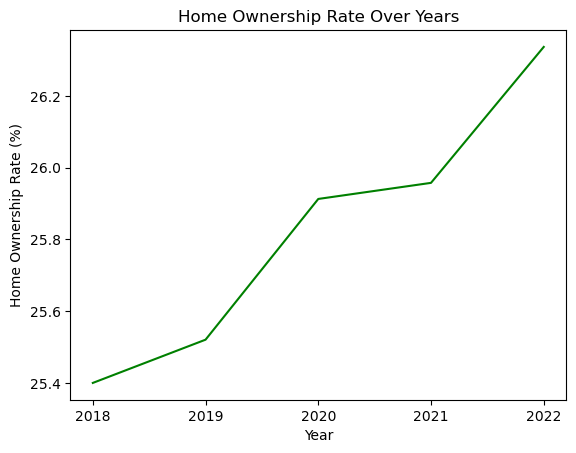

In [37]:
# Plot the home ownership rate over the years
plt.plot(yearly_ownership_rate.index, yearly_ownership_rate.values, linestyle='-', color='g')
plt.title('Home Ownership Rate Over Years')
plt.xlabel('Year')
plt.xticks(ticks=[2018, 2019, 2020, 2021, 2022])
plt.ylabel('Home Ownership Rate (%)')
plt.show()

In [14]:
labels = []
medians = []
for data_year in data_years:
    labels.append(str(data_year))
    medians.append(census_pd.loc[census_pd["Year"] == data_year]["Household Income"].median())

medians

[49729.0, 51894.0, 53535.5, 56844.0, 61903.0]

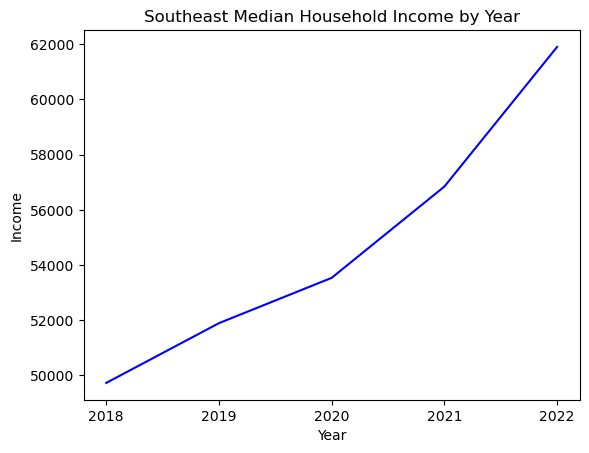

In [15]:
plt.plot(labels, medians, "b-")

# Incorporate the other graph properties
plt.title('Southeast Median Household Income by Year')
plt.xlabel('Year')
plt.ylabel('Income')

# Show plot
plt.show()

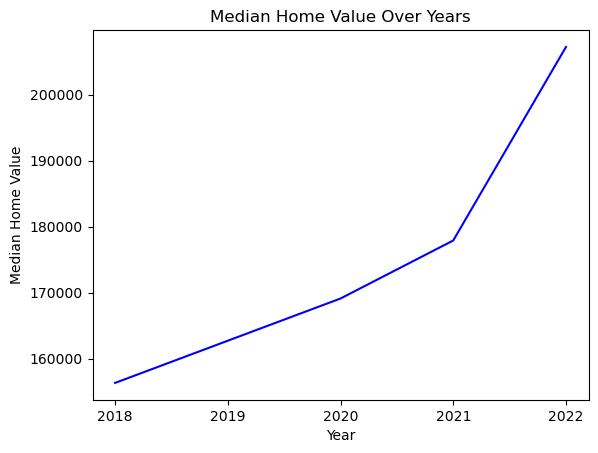

In [24]:
# Filter the data to get median home values over the years
years = census_pd["Year"].unique()
median_home_values = []

for year in years:
    median_value = census_pd.loc[census_pd["Year"] == year]["Median Home Value"].median()
    median_home_values.append(median_value)

# Create the plot
# plt.figure(figsize=(10, 6))
plt.plot(years, median_home_values, linestyle='-', color='b')
plt.title('Median Home Value Over Years')
plt.xlabel('Year')
plt.xticks(ticks=[2018, 2019, 2020, 2021, 2022])
plt.ylabel('Median Home Value')

# Show the plot
plt.show()

In [70]:
census_pd[["Median Home Value", "Median Monthly Costs with Mortgage"]].describe()

,Median Home Value,Median Monthly Costs with Mortgage
count,60.000000,60.000000
mean,179023.333333,1340.616667
std,50686.328069,220.530108
min,114500.000000,1023.000000
25%,142550.000000,1184.500000
50%,167000.000000,1292.500000
75%,197700.000000,1449.000000
max,339800.000000,2014.000000


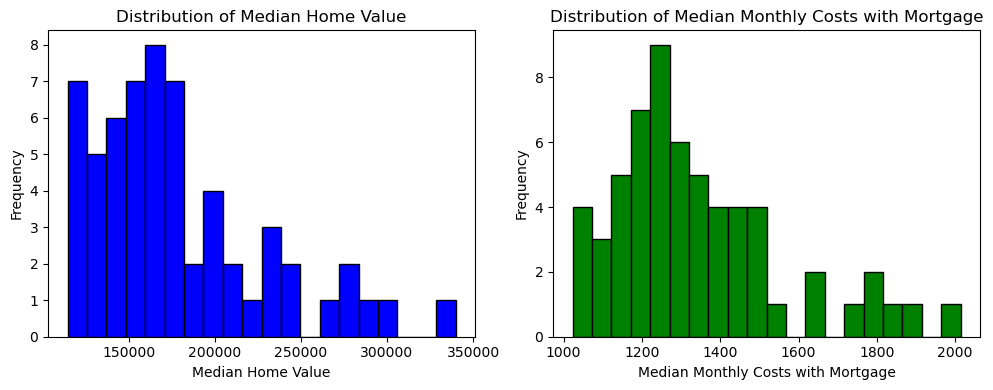

In [71]:
plt.figure(figsize=(10, 4))

# Histogram for Median Home Value
plt.subplot(1, 2, 1)
plt.hist(home_values, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Median Home Value')
plt.xlabel('Median Home Value')
plt.ylabel('Frequency')

# Histogram for Median Monthly Costs with Mortgage
plt.subplot(1, 2, 2)
plt.hist(costs_with_mortgage, bins=20, color='green', edgecolor='black')
plt.title('Distribution of Median Monthly Costs with Mortgage')
plt.xlabel('Median Monthly Costs with Mortgage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

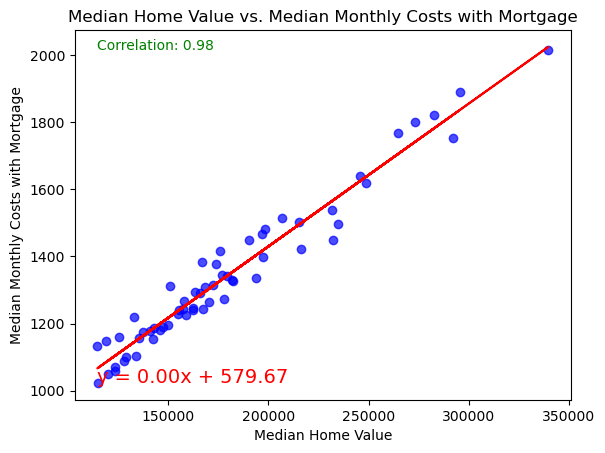

In [65]:
# Calculate Pearson correlation, Perform linear regression calculate regression line.
correlation = st.pearsonr(home_values, costs_with_mortgage)
slope, intercept, r_value, p_value, std_err = st.linregress(home_values, costs_with_mortgage)
regression_line = slope * home_values + intercept

# Extract the relevant columns for the scatter plot
home_values = census_pd["Median Home Value"]
costs_with_mortgage = census_pd["Median Monthly Costs with Mortgage"]


# Apply the regression line
plt.plot(home_values, regression_line, "r-", label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
plt.text(min(home_values), max(costs_with_mortgage), f'Correlation: {correlation[0]:.2f}', color='green')

# Add regression equation 
equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(home_values.min(), costs_with_mortgage.min(), equation_text, fontsize=14, color="red")

# Create the scatter plot
plt.scatter(home_values, monthly_costs_with_mortgage, alpha=0.7, color='b')
plt.title('Median Home Value vs. Median Monthly Costs with Mortgage')
plt.xlabel('Median Home Value')
plt.ylabel('Median Monthly Costs with Mortgage')

# Show the plot
plt.show()

In [69]:
census_pd[["Median Home Value", "Median Monthly Costs without Mortgage"]].describe()

,Median Home Value,Median Monthly Costs without Mortgage
count,60.000000,60.000000
mean,179023.333333,406.066667
std,50686.328069,60.001092
min,114500.000000,319.000000
25%,142550.000000,362.750000
50%,167000.000000,389.500000
75%,197700.000000,436.250000
max,339800.000000,590.000000


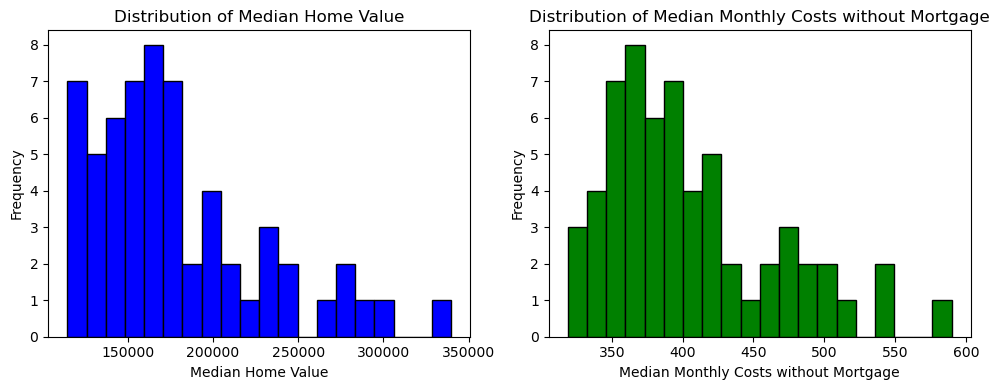

In [75]:
plt.figure(figsize=(10, 4))

# Histogram for Median Home Value
plt.subplot(1, 2, 1)
plt.hist(home_values, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Median Home Value')
plt.xlabel('Median Home Value')
plt.ylabel('Frequency')

# Histogram for Median Monthly Costs without Mortgage
plt.subplot(1, 2, 2)
plt.hist(costs_without_mortgage, bins=20, color='green', edgecolor='black')
plt.title('Distribution of Median Monthly Costs without Mortgage')
plt.xlabel('Median Monthly Costs without Mortgage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

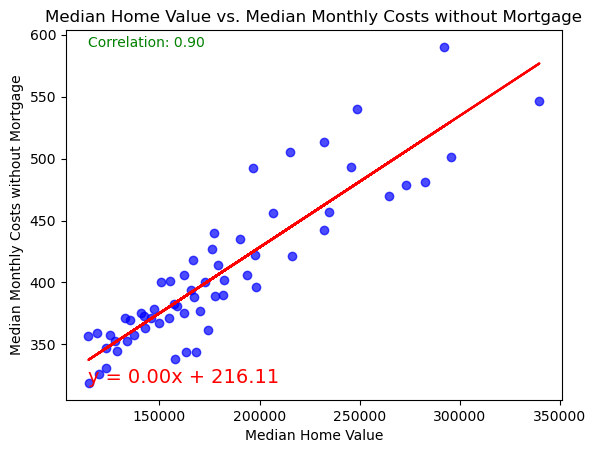

In [76]:
correlation = st.pearsonr(home_values, costs_without_mortgage)
slope, intercept, r_value, p_value, std_err = st.linregress(home_values, costs_without_mortgage)
regression_line = slope * home_values + intercept


# Extract the relevant columns for the scatter plot
home_values = census_pd["Median Home Value"]
costs_without_mortgage = census_pd["Median Monthly Costs without Mortgage"]

# Apply the regression line
plt.plot(home_values, regression_line, "r-", label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
plt.text(min(home_values), max(costs_without_mortgage), f'Correlation: {correlation[0]:.2f}', color='green')

# Add regression equation 
equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(home_values.min(), costs_without_mortgage.min(), equation_text, fontsize=14, color="red")
# Apply the regression line 
plt.plot(home_values, regressValues(home_values, costs_without_mortgage),"r-")

# Create the scatter plot
plt.scatter(home_values, monthly_costs_without_mortgage, alpha=0.7, color='b')
plt.title('Median Home Value vs. Median Monthly Costs without Mortgage')
plt.xlabel('Median Home Value')
plt.ylabel('Median Monthly Costs without Mortgage')

# Show the plot
plt.show()

In [52]:
def regressValues(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    return regress_values

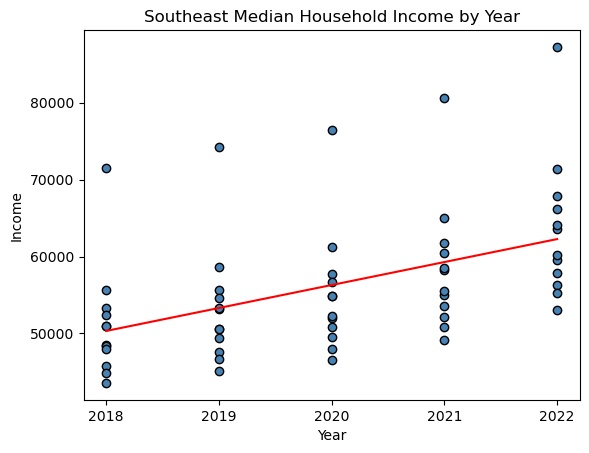

In [17]:
plt.plot(census_pd["Year"], regressValues(census_pd["Year"], census_pd["Household Income"]),"r-")
plt.scatter(census_pd["Year"], census_pd["Household Income"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('Southeast Median Household Income by Year')
plt.xlabel('Year')
plt.xticks(ticks=[2018, 2019, 2020, 2021, 2022])
plt.ylabel('Income')

# Show plot
plt.show()

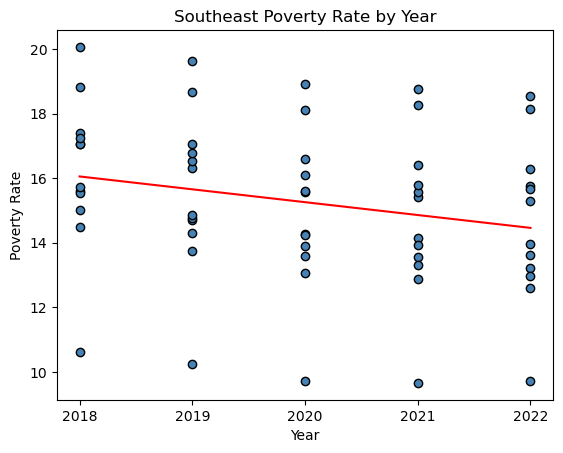

In [18]:
plt.plot(census_pd["Year"], regressValues(census_pd["Year"], census_pd["Poverty Rate"]),"r-")
plt.scatter(census_pd["Year"], census_pd["Poverty Rate"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('Southeast Poverty Rate by Year')
plt.xticks(ticks=[2018, 2019, 2020, 2021, 2022])
plt.xlabel('Year')
plt.ylabel('Poverty Rate')

# Show plot
plt.show()

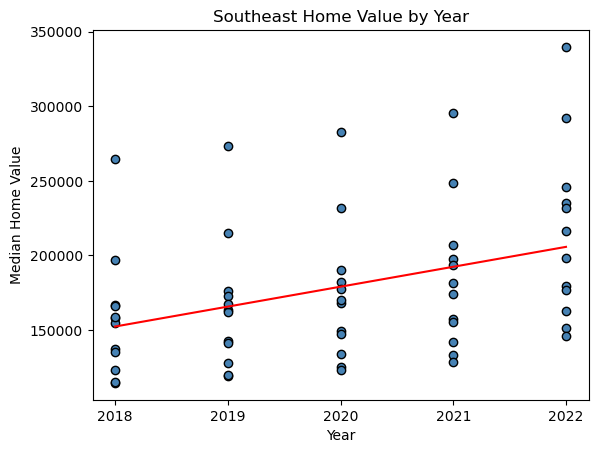

In [21]:
plt.plot(census_pd["Year"], regressValues(census_pd["Year"], census_pd["Median Home Value"]),"r-")
plt.scatter(census_pd["Year"], census_pd["Median Home Value"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('Southeast Home Value by Year')
plt.xticks(ticks=[2018, 2019, 2020, 2021, 2022])
plt.xlabel('Year')
plt.ylabel('Median Home Value')

# Show plot
plt.show()